# Characterizing seascapes taxanomically

In this notebook we'll focus on:
+ [x] comparing seascapes by top 10 class that are found; and how much percentage they are found
    + [x] are some species common?
    + [x] which species look charactertisitic to a seascape?
    + [ ] perhaps perform a probability test both seascape->taxa and taxa->seascape
    + [ ] what are the biological traits of these characteristic species


+ [ ] how do seascape differ in the ammount of biodiversity they offer?
    + [ ] which seascapes support more biodiversity
    + [ ] how does class biodiversity vary with seascapes

## import modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy as cpy
import geopandas as gpd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import gc
import os
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## importing data

In [4]:
occdf = pd.read_csv("../input/obis-florida-keys-occurrence-records-19972012/florida-keys-1997-2012.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (49,77,79,95,97,99,100,104,105,112,113,115,117,134,149,150,158,159,160,165,166,167,168,169,170,172,173,174,175,177,178,179,181,182,183,184,185,186,188,189,190,191,192,193,194,196) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
data = pd.read_csv("https://cwcgom.aoml.noaa.gov/erddap/griddap/noaa_aoml_seascapes_8day.csv?CLASS%5B(2022-07-20T12:00:00Z)%5D%5B(23.025):(28.025)%5D%5B(-83.575):(-78.125)%5D&.draw=surface&.vars=longitude%7Clatitude%7CCLASS&.colorBar=%7C%7C%7C%7C%7C&.bgColor=0xffccccff")

##  cleaning data

Let us drop some unneccessary columns from occdf to make it faster as well more meaningful.

In [6]:
occdf.drop([
    'Unnamed: 0',
#  'infraphylum',
 'country',
#  'date_year',
#  'habitat',
 'references',
#  'scientificNameID',
#  'scientificName',
 'dropped',
#  'gigaclassid',
#  'aphiaID',
 'language',
#  'decimalLatitude',
#  'subclassid',
 'type',
#  'gigaclass',
#  'infraphylumid',
 'phylumid',
 'familyid',
 'occurrenceStatus',
 'basisOfRecord',
 'terrestrial',
 'modified',
#  'maximumDepthInMeters',
#  'id',
#  'parvphylum',
#  'order',
#  'dataset_id',
#  'minimumElevationInMeters',
 'stateProvince',
#  'decimalLongitude',
#  'date_end',
#  'speciesid',
#  'occurrenceID',
#  'maximumElevationInMeters',
 'license',
#  'date_start',
#  'genus',
 'ownerInstitutionCode',
#  'samplingProtocol',
#  'eventDate',
#  'eventID',
#  'brackish',
 'scientificNameAuthorship',
 'absence',
#  'samplingEffort',
#  'taxonRank',
 'genusid',
 'originalScientificName',
 'marine',
#  'minimumDepthInMeters',
 'subphylumid',
#  'date_mid',
#  'class',
 'orderid',
 'datasetName',
#  'geodeticDatum',
#  'kingdom',
#  'waterBody',
 'classid',
#  'phylum',
#  'depth',
#  'species',
#  'subphylum',
#  'subclass',
#  'datasetID',
#  'family',
 'kingdomid',
 'parvphylumid',
 'node_id',
#  'flags',
#  'sss',
#  'shoredistance',
#  'sst',
#  'bathymetry',
#  'coordinateUncertaintyInMeters',
#  'individualCount',
 'associatedMedia',
 'associatedReferences',
#  'organismQuantity',
 'acceptedNameUsage',
#  'sampleSizeUnit',
 'locality',
 'suborderid',
#  'organismQuantityType',
 'acceptedNameUsageID',
 'vernacularName',
#  'suborder',
#  'taxonomicStatus',
#  'specificEpithet',
#  'sampleSizeValue',
#  'wrims',
#  'subfamily',
 'subfamilyid',
 'county',
 'municipality',
 'catalogNumber',
#  'infraspecificEpithet',
#  'verbatimEventDate',
#  'georeferencedBy',
 'island',
 'collectionCode',
 'materialSampleID',
#  'dateIdentified',
#  'identificationQualifier',
 'islandGroup',
#  'preparations',
 'institutionCode',
 'identificationRemarks',
 'identifiedBy',
 'georeferenceProtocol',
#  'sex',
 'typeStatus',
 'verbatimSRS',
#  'footprintWKT',
 'verbatimCoordinateSystem',
 'recordedBy',
#  'lifeStage',
 'verbatimCoordinates',
 'occurrenceRemarks',
#  'category',
 'superfamilyid',
#  'superclass',
 'superclassid',
 'infraorderid',
#  'superfamily',
#  'superorder',
 'superorderid',
#  'infraorder',
#  'taxonRemarks',
 'infraclassid',
#  'infraclass',
 'recordNumber',
 'georeferencedDate',
 'organismID',
 'bibliographicCitation',
#  'eventTime',
 'nomenclaturalCode',
#  'coordinatePrecision',
#  'subkingdom',
#  'infrakingdom',
 'subkingdomid',
 'infrakingdomid',
#  'section',
#  'subsection',
 'sectionid',
 'subsectionid',
 'tribeid',
#  'tribe',
#  'subspecies',
#  'subgenus',
 'subgenusid',
 'subspeciesid',
 'year',
 'day',
 'month',
 'higherGeography',
#  'continent',
 'georeferenceSources',
#  'hab',
 'countryCode',
 'subterclassid',
#  'subterclass',
#  'parvorder',
 'parvorderid',
#  'dynamicProperties',
 'accessRights',
 'rightsHolder',
 'collectionID',
 'institutionID',
 'fieldNumber',
 'parentNameUsageID',
 'eventRemarks',
#  'taxonID',
 'locationID',
#  'megaclass',
 'megaclassid',
 'georeferenceRemarks',
 'establishmentMeans',
 'locationAccordingTo',
 'endDayOfYear',
 'verbatimLocality',
#  'higherClassification',
 'identificationVerificationStatus',
 'georeferenceVerificationStatus',
 'previousIdentifications',
#  'organismRemarks',
 'startDayOfYear',
 'otherCatalogNumbers',
 'footprintSRS',
 'associatedSequences',
 'locationRemarks',
#  'behavior',
#  'verbatimDepth',
#  'taxonConceptID',
 'subtribeid',
#  'subtribe',
], axis=1, inplace=True)

In [7]:
occdf.head()

,infraphylum,date_year,habitat,scientificNameID,scientificName,gigaclassid,aphiaID,decimalLatitude,subclassid,gigaclass,...,parvorder,dynamicProperties,taxonID,megaclass,higherClassification,organismRemarks,behavior,verbatimDepth,taxonConceptID,subtribe
0,Gnathostomata,2009,Spur and Groove low Relief,urn:lsid:marinespecies.org:taxname:276677,Stegastes partitus,10194.0,276677,25.227550,293496.0,Actinopterygii,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2011,NaN,urn:lsid:marinespecies.org:taxname:164811,Demospongiae,NaN,164811,24.553300,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2008,Deep Fore Reef,urn:lsid:marinespecies.org:taxname:210726,Millepora alcicornis,NaN,210726,24.542100,19494.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gnathostomata,2010,Spur and Groove low Relief,urn:lsid:marinespecies.org:taxname:275764,Halichoeres garnoti,10194.0,275764,24.946360,293496.0,Actinopterygii,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gnathostomata,2012,Spur and Groove High Relief,urn:lsid:marinespecies.org:taxname:276025,Pomacanthus paru,10194.0,276025,25.037767,293496.0,Actinopterygii,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let us also frame a new non-NaN seascape class dataframe and change its dtypes for easy analysis.

In [8]:
temp = data[data.CLASS.notna()]
temp.drop(0, axis=0, inplace=True)
temp.CLASS = temp.CLASS.astype(int)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
temp[["longitude", "latitude"]] = temp[["longitude", "latitude"]].astype(float)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


## analysis
### question 1

In [11]:
classes = temp.CLASS.unique()
classes.sort()
print("Taxonomic Distribution of Seascape Classes\n\
==========================================\n")
for Class in classes:
    l = pd.Series(dtype=int)
    for i in temp[temp.CLASS == Class].iterrows():
        l = pd.concat([l,pd.Series(occdf[(occdf.decimalLongitude.between(i[1].longitude - 0.025, i[1].longitude + 0.025)) & (occdf.decimalLatitude.between(i[1].latitude - 0.025, i[1].latitude + 0.025))].index)])
    print(f"\
    \tSeascape Class: {Class}\n-------------------------------\n")
    class_acc = occdf.loc[l.values, : ].groupby("class").scientificName.count()
    class_acc = class_acc/class_acc.sum()*100
    print(class_acc.nlargest(10))
    print("\n-------------------------------")

Taxonomic Distribution of Seascape Classes

    	Seascape Class: 3
-------------------------------

class
Actinopteri       98.329956
Anthozoa           1.221322
Hydrozoa           0.148368
Elasmobranchii     0.077803
Polychaeta         0.074184
Dinophyceae        0.037997
Malacostraca       0.018094
Bivalvia           0.012666
Ulvophyceae        0.012666
Cyanophyceae       0.010856
Name: scientificName, dtype: float64

-------------------------------
    	Seascape Class: 5
-------------------------------

class
Actinopteri       78.884120
Elasmobranchii    10.472103
Anthozoa           2.231760
Malacostraca       2.231760
Ophiuroidea        1.201717
Aves               1.030043
Demospongiae       1.030043
Monogenea          0.772532
Thecostraca        0.515021
Echinoidea         0.429185
Name: scientificName, dtype: float64

-------------------------------
    	Seascape Class: 11
-------------------------------

class
Gastropoda        37.500000
Bivalvia          29.166667
Actinopteri  

The above output has been clipped to Top 10 taxonomic `class` in each Seascape.

#### conclusions
+ *Actinoperi* is the most widely present `class` in all seascapes.
+ Seascapes do have characteristic taxonomic classes.

#### distribution chart


									Taxonomic Composition of Seascapes per Class


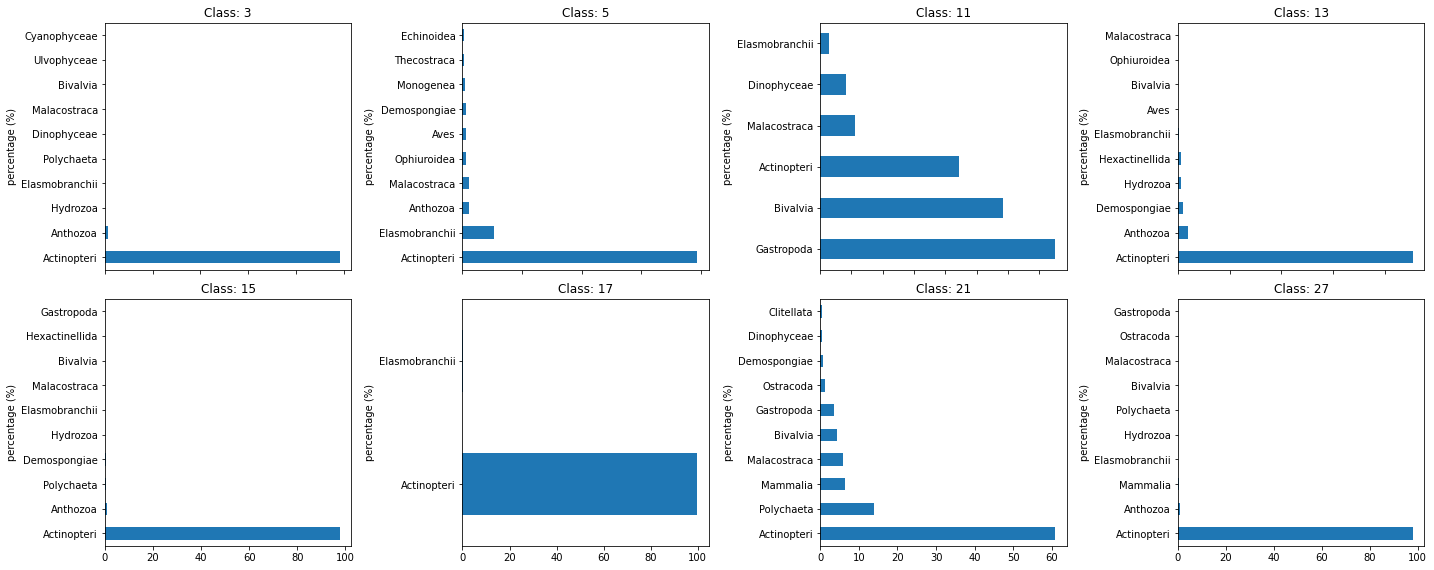

In [22]:
fig, ax = plt.subplots(2,4)
k, j = 0, 0
print("\t\t\t\t\t\t\t\t\tTaxonomic Composition of Seascapes per Class")
print("\t\t\t\t\t\t\t\t\t============================================")
for Class in classes:
    # fetch the data
    l = pd.Series(dtype=int)
    for i in temp[temp.CLASS == Class].iterrows():
        l = pd.concat([l,pd.Series(occdf[(occdf.decimalLongitude.between(i[1].longitude - 0.025, i[1].longitude + 0.025)) & (occdf.decimalLatitude.between(i[1].latitude - 0.025, i[1].latitude + 0.025))].index)])
    
    # dress the data
    class_acc = occdf.loc[l.values, : ].groupby("class").scientificName.count()
    class_acc = class_acc/class_acc.sum()*100
    
    # now plot the bar charts
    class_acc.nlargest(10).plot.barh(ax = ax[k][j], sharex=True, figsize=(20, 8))
    ax[k][j].set_ylabel('percentage (%)')
    ax[k][j].set_title(f"Class: {Class}")
    fig.tight_layout(pad=1)
    if j==3:
        k = 1
    j = (j+1)%4
plt.show()

#### Questions to ask
+ Seascape #11 looks interesting because there is more equitable distribution. Why?
+ Seascape #21 Polychaeta significant number, better proportion. Why?
+ Seascape #17 The taxonomic diversity looks very less. Why?
+ Seascape class #13 percentage of Actinopteri is reduced slightly. Why?
+ Actinopteri is so widely present and dominant in almost all classes. Why?